<a href="https://colab.research.google.com/github/gyasifred/NLP-Techniques/blob/main/tensorflow_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import pydot
from tensorflow.keras.models import Model

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Sequential API

In [ ]:
def build_sequential_model():
    seq_model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return seq_model

# Functional API

In [ ]:
def build_functional_model():
    input = tf.keras.Input(shape=(28, 28))
    x = tf.keras.layers.Flatten()(input)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)
    func_model = Model(input, x)
    return func_model

# Build the model and visualize the model graph

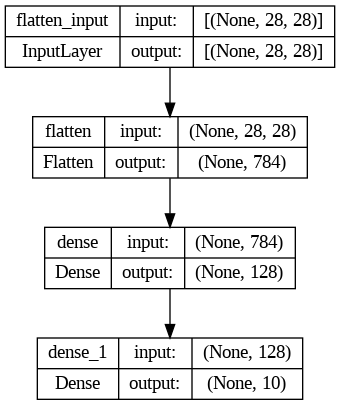

In [ ]:
#sequential
model = build_sequential_model()
# Plot model graph
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')


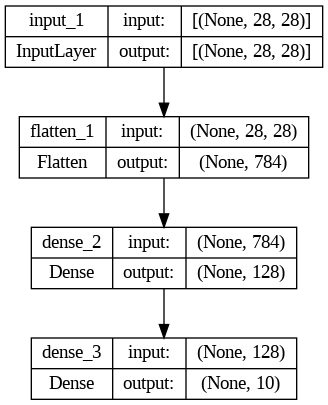

In [ ]:
#functional
model_fn = build_functional_model()
# Plot model graph
tf.keras.utils.plot_model(model_fn, show_shapes=True, show_layer_names=True, to_file='model.png')


# Training the model

In [ ]:
# prepare the fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5034 - accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3804 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3412 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3174 - accuracy: 0.8843
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8726


[0.34821176528930664, 0.8726000189781189]

In [ ]:
# configure, train, and evaluate the model
model_fn.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_fn.fit(training_images, training_labels, epochs=5)
model_fn.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5027 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3391 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3140 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8748


[0.33994168043136597, 0.8748000264167786]